In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from stargazer.stargazer import Stargazer
import scipy.stats as stats
import seaborn as sns
import os

In [27]:
# File Paths
absolute_path = "C:\\Users\\tykun\\\OneDrive\\Documents\\SchoolDocs\VSCodeProjects\\connectedData\\board_analysis\\"
altered_dataframes = "altered_dataframes\\"
gpt_dataframes = "gpt_dataframes\\"
graphs = "graphs\\"
scripts =  "scripts\\"
board_dataframes = "board_dataframes\\"
temporary = "temporary_data\\"
final_scripts = "final_scripts\\"
normalized_dataframes = "normalized_dataframes\\"
college_matching = "college_matching\\"
regression = "regression\\"
normalized_dataframes = "normalized_dataframes\\"
normalized_regression_boards = "normalized_regression_boards\\"
network = "network\\"
network_boards = "network_boards\\"

altered_dataframe_path = f"{absolute_path}{altered_dataframes}"
gpt_dataframe_path = f"{absolute_path}{gpt_dataframes}" 
graph_path = f"{absolute_path}{graphs}"
script_path = f"{absolute_path}{scripts}"
boards_path = f"{absolute_path}{board_dataframes}"
temporary_data_path = f"{absolute_path}{temporary}"
regression_path =  f"{absolute_path}{final_scripts}{regression}"
regression_boards_path = f"{regression_path}{normalized_regression_boards}"


years = ["1999", "2000", "2005", "2007", "2008", "2009", "2011", "2013", "2018"]


In [28]:
university_stats_path = os.path.join(regression_path, "regression_stats\\regression_university_board_statistics.csv")
school_stats_path = os.path.join(regression_path, "regression_stats\\university_statistics_for_regression_new.csv")

university_board_statistics_df = pd.read_csv(university_stats_path)
school_statistics_df = pd.read_csv(school_stats_path)

In [29]:
#log the continuous variables that are not 0-1
cols_to_log = ['cost.tuition.out_of_state', 'school.faculty_salary', 'RD_expenditure', 'student.size']
for col in cols_to_log:
    university_board_statistics_df[col] = np.log10(university_board_statistics_df[col])

In [30]:
file_path = os.path.join("C:\\Users\\tykun", "Downloads", "shangha ranming", "ShanghaiUniversityRanking", "ShanghaiUniversityRanking_ShanghaiRanking2003.hdf")
df = pd.read_hdf(file_path)
print(df.head)

<bound method NDFrame.head of         Rank                            FullName  \
0          1                  Harvard University   
1          2                 Stanford University   
2          3  California Institute of Technology   
3          4  University of California, Berkeley   
4          5             University of Cambridge   
..       ...                                 ...   
510  451-500            University of Valladolid   
511  451-500     University of the Witwatersrand   
512  451-500               University of Wroclaw   
513  451-500              University of Zaragoza   
514  451-500            West Virginia University   

                                                  href        Country  \
0    World-University-Rankings/Harvard-University.html   UnitedStates   
1    World-University-Rankings/Stanford-University....   UnitedStates   
2    World-University-Rankings/California-Institute...   UnitedStates   
3    World-University-Rankings/University-of-Califo..

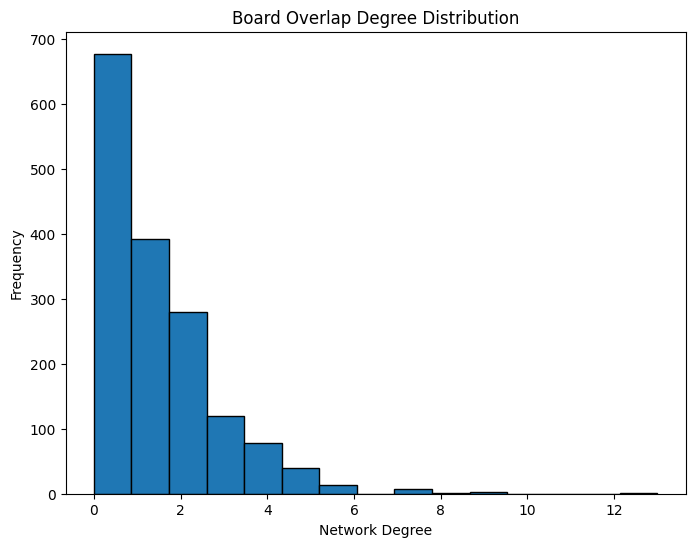

In [31]:
plt.figure(figsize=(8, 6))
university_board_statistics_df["degree"].plot(kind="hist", bins=15, edgecolor="black")
plt.xlabel("Network Degree")
plt.ylabel("Frequency")
plt.title("Board Overlap Degree Distribution")
plt.show()

degree_counts = university_board_statistics_df["degree"].value_counts().sort_index()

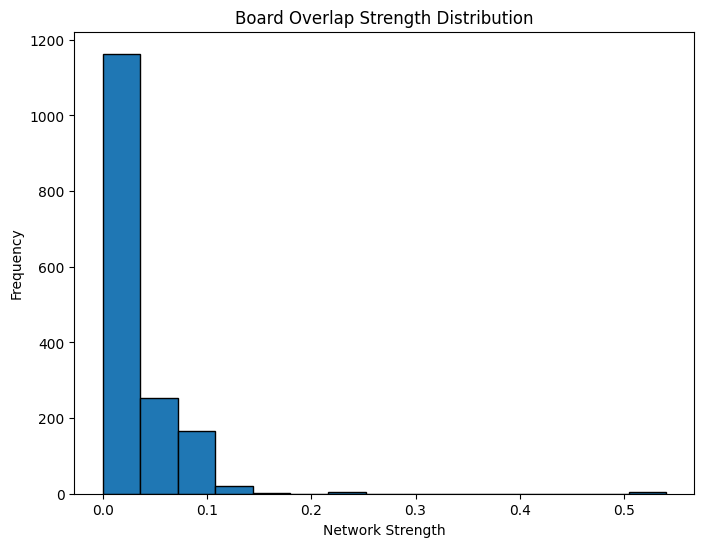

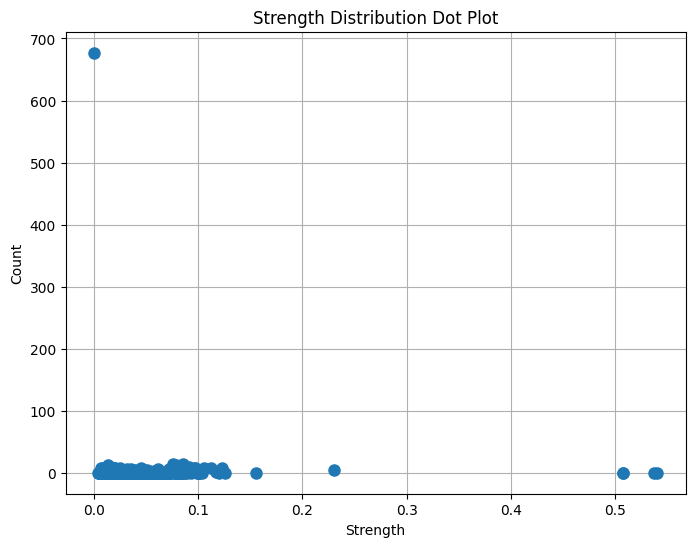

In [32]:
plt.figure(figsize=(8, 6))
university_board_statistics_df["strength"].plot(kind="hist", bins=15, edgecolor="black")
plt.xlabel("Network Strength")
plt.ylabel("Frequency")
plt.title("Board Overlap Strength Distribution")
plt.show()

# Dot Plot for Strength Distribution
strength_counts = university_board_statistics_df["strength"].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.plot(strength_counts.index, strength_counts.values, 'o', markersize=8)  # 'o' for dot marker
plt.xlabel("Strength")
plt.ylabel("Count")
plt.title("Strength Distribution Dot Plot")
plt.grid(True)
plt.show()


In [33]:
university_board_statistics_df.to_csv(university_stats_path, index = False)